### Problem Statement:

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem. Fraud is causing billions of $$ in loss for insurance industry. This project has attempted to develop a ML algorithm to detect. The project has used the historical transaction data including normal transactions and fraud ones to obtain normal/fraud behavior features based on machine learning techniques, and utilized these features to check if a transaction is fraud or not. A comparative study has been conducted to decide which classifier is best for this project to train the behavior features of normal and abnormal transactions.

#### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

#Importing Visualising Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import scikitplot as skplt
import missingno as msno


#Importing DataCleaning Libraries
from sklearn.preprocessing import  PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from collections import Counter

#Importing Classification Models 
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Importing Classification Model Evaluation Metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score

#Importing Hyperparameter Tuning model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Importing Serialization libraries
import joblib


In [2]:
#Loading Dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [3]:
#Checking Datatypes and Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

### About Dataset : 
This dataset has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

- FEATURES :

    - Company's data for fraud claim policy : months_as_customer, age, policy_number, policy_bind_date, policy_csl, policy_deductable, policy_annual_premium, umbrella_limit


    - Personal Details of Customer : insured_zip, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, capital- gains, capital-loss.

    - Details of incident: incident_date, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_location, incident_hour_of_the_day, number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available, total_amount_claimed, injury_claim, property_claim, vehicle_claim, auto_make, auto_model, auto_year


- Target Variable :
    - fraud_reported : YES / NO



### Exploratory Data Analysis (EDA)

In [4]:
# Shape of dataset
print('Shape of our Dataset is - Rows: {} Columns: {}'.format(df.shape[0], df.shape[1]))

Shape of our Dataset is - Rows: 1000 Columns: 40


In [5]:
#Checking for null values
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
#Dropping empty column _c39
df.drop('_c39',axis = 1, inplace = True)

In [7]:
#Checking for duplicate record/fields
df.duplicated().sum()

0

In [8]:
#Statistical Overview of our Numerical Features
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

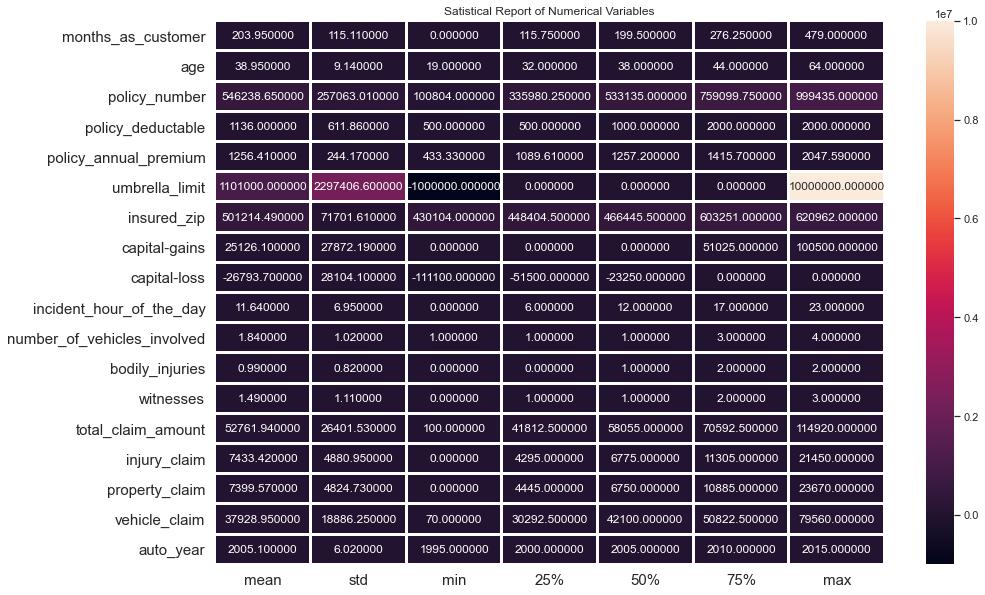

In [9]:
#visualizing statistical description of dataset
plt.figure(figsize = (15,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth = 2,annot= True, fmt = "f")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Satistical Report of Numerical Variables")
plt.show()

- Months_as_customer : 
    - mean : 203.95
    - std : 115.15
    - min : 0
    - max : 479
    
    
- age :
    - mean : 38.95
    - std : 9.14
    - min : 19
    - max : 64
    
    
- policy_number :
    - mean : 546328.65
    - std : 257063.01
    - min : 100804
    - max : 999435
    
    
- policy_deductable :
    - mean : 1136
    - std : 611.86
    - min : 500
    - max : 2000


- policy_annual_premium :
    - mean : 1256.41
    - std : 244.17
    - min : 433.33
    - max : 2047.5


- umbrella_limit :
    - mean : 1101000
    - std : 2297406.6
    - min : -1000000
    - max : 10000000


- insured_zip :
    - mean : 501214.49
    - std : 71701.61
    - min : 43104
    - max : 620962


- capital-gains :
    - mean : 25126.1
    - std : 27872.19
    - min : 0
    - max : 100500


- capital-loss :
    - mean : -26793.7
    - std : 28104.1
    - min : -111100
    - max : 0


- incident_hour_of_the_day :
    - mean : 11.64
    - std : 6.95
    - min : 0
    - max : 23


- number_of_vehicles_involved :
    - mean : 1.84
    - std : 1.02
    - min : 1
    - max : 4


- bodily_injuries :
    - mean : 0.99
    - std : 0.82
    - min : 0
    - max : 2


- witnesses :
    - mean : 1.49
    - std : 1.11
    - min : 0
    - max : 3


- total_claim_amount :
    - mean : 52761.94
    - std : 26401.53
    - min : 100
    - max : 114920


- injury_claim :
    - mean : 7433.22
    - std : 4880.95
    - min : 0
    - max : 21450


- vehicle_claim :
    - mean : 37928.95 
    - std : 18886.25
    - min : 70
    - max : 79560
    
    
- property_claim :
    - mean : 7399.57
    - std : 4824.74
    - min : 0
    - max : 23670
    
    
- auto_year :
    - mean : 2005.1
    - std : 6.02
    - min : 1995
    - max : 2015

### Data Cleaning

In [10]:
# Converting Date column into seperate day - month -  year columns using pandas Datetime function.
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['policy_bind_Month'] = df['policy_bind_date'].apply(lambda x:x.month)
df['policy_bind_Day'] = df['policy_bind_date'].apply(lambda x:x.day)
df['policy_bind_Year'] = df['policy_bind_date'].apply(lambda x:x.year)

In [11]:
# Converting Date column into seperate day - month -  year columns using pandas Datetime function.
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['incident_Month'] = df['incident_date'].apply(lambda x:x.month)
df['incident_Day'] = df['incident_date'].apply(lambda x:x.day)
df['incident_Year'] = df['incident_date'].apply(lambda x:x.year)

In [12]:
#Dropping Nominal Data
df.drop(columns = ['policy_bind_date','incident_date','incident_location'], axis = 1, inplace = True)

In [13]:
#Replacing unknown category "?" with "unknown"
df['collision_type'] = df['collision_type'].replace('?','unknown')
df['property_damage'] = df['property_damage'].replace('?','unknown')
df['police_report_available'] = df['police_report_available'].replace('?','unknown')

In [14]:
#Encoding our feature.
df['policy_csl'] = df['policy_csl'].replace('100/300', 0)
df['policy_csl'] = df['policy_csl'].replace('250/500', 1)
df['policy_csl'] = df['policy_csl'].replace('500/1000', 2)

### Univariate Analysis

Text(0.5, 1.0, 'Categorical Distribution of policy_State')

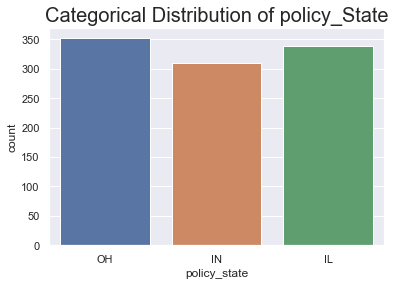

In [15]:
sns.countplot(df['policy_state'])
plt.title("Categorical Distribution of policy_State", fontsize = 20)

- Highest frauds have occured in Ohio.

Text(0.5, 1.0, 'Categorical Distribution of Gender')

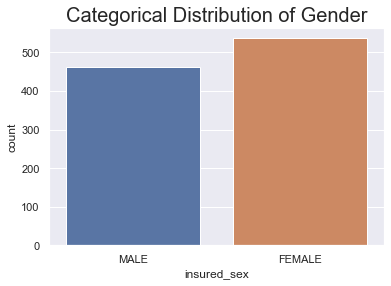

In [16]:
sns.countplot(df['insured_sex'])
plt.title("Categorical Distribution of Gender", fontsize = 20)

- Female have reported more Insurance Frauds.

Text(0.5, 1.0, 'Categorical Distribution of insured_education_level')

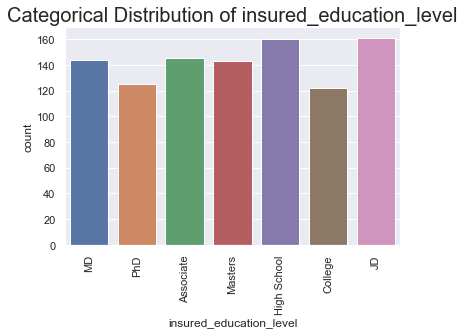

In [17]:
sns.countplot(df['insured_education_level'])
plt.xticks(rotation = 90)
plt.title("Categorical Distribution of insured_education_level", fontsize = 20)

- Most frauds are reported by people with High School Degree.

Text(0.5, 1.0, 'Categorical Distribution of insured_occupation')

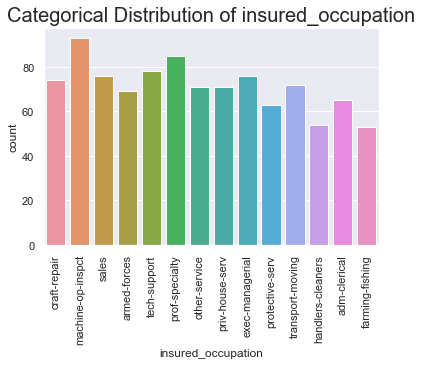

In [18]:
sns.countplot(df['insured_occupation'])
plt.xticks(rotation = 90)
plt.title("Categorical Distribution of insured_occupation", fontsize = 20)

- Most frauds are reported by people working as a machine-op-inspect.

Text(0.5, 1.0, 'Categorical Distribution of insured_hobbies')

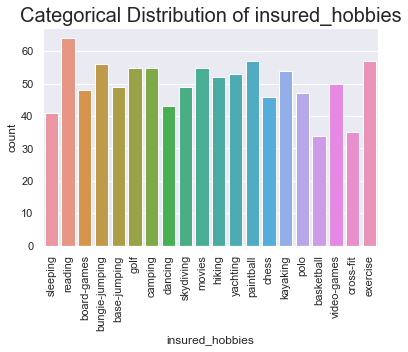

In [19]:
sns.countplot(df['insured_hobbies'])
plt.xticks(rotation = 90)
plt.title("Categorical Distribution of insured_hobbies", fontsize = 20)

- Most frauds are reported by people who like to read.

Text(0.5, 1.0, 'Categorical Distribution of insured_relationship')

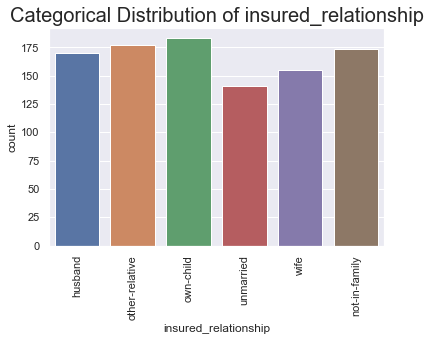

In [20]:
sns.countplot(df['insured_relationship'])
plt.xticks(rotation = 90)
plt.title("Categorical Distribution of insured_relationship", fontsize = 20)

- Most frauds are reported by people who have children.

Text(0.5, 1.0, 'Categorical Distribution of Type of Incident')

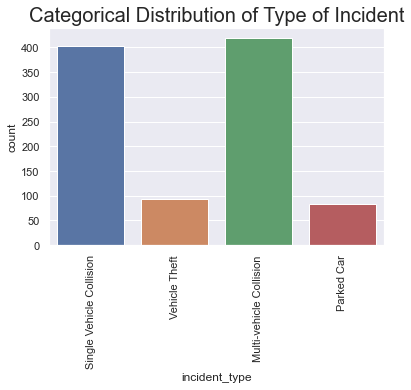

In [21]:
sns.countplot(df['incident_type'])
plt.xticks(rotation = 90)
plt.title("Categorical Distribution of Type of Incident", fontsize = 20)

- Most frauds are reported by people who witnessed Multi-Vehicle collision.

Text(0.5, 1.0, 'Categorical Distribution of State of Incident')

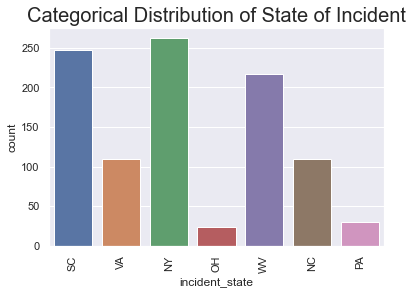

In [22]:
sns.countplot(df['incident_state'])
plt.xticks(rotation = 90)
plt.title("Categorical Distribution of State of Incident", fontsize = 20)

- Most frauds are reported by people from New York.

Text(0.5, 1.0, 'Categorical Distribution of Type of Incident')

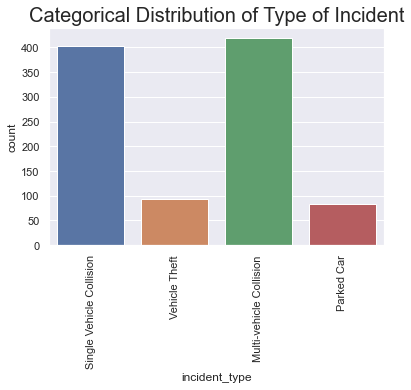

In [23]:
sns.countplot(df['incident_type'])
plt.xticks(rotation = 90)
plt.title("Categorical Distribution of Type of Incident", fontsize = 20)

Text(0.5, 1.0, 'Categorical Distribution of Type of Collision')

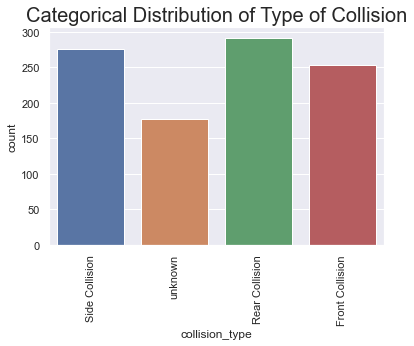

In [24]:
sns.countplot(df['collision_type'])
plt.xticks(rotation = 90)
plt.title("Categorical Distribution of Type of Collision", fontsize = 20)

- Most frauds are reported by people who were in Rear Collision incident.

Text(0.5, 1.0, 'Categorical Distribution of Incident Severity')

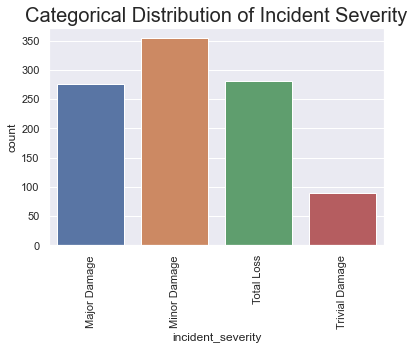

In [25]:
sns.countplot(df['incident_severity'])
plt.xticks(rotation = 90)
plt.title("Categorical Distribution of Incident Severity", fontsize = 20)

- - Most frauds are reported by people who faced Minor Damage.

Text(0.5, 1.0, 'Categorical Distribution of City of Incident')

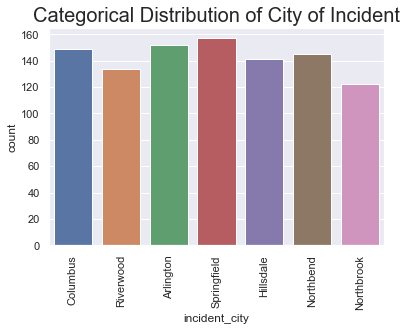

In [26]:
sns.countplot(df['incident_city'])
plt.xticks(rotation = 90)
plt.title("Categorical Distribution of City of Incident", fontsize = 20)

- Most frauds are reported by people who are from Springfield

Text(0.5, 1.0, 'Categorical Distribution of Property Damaged')

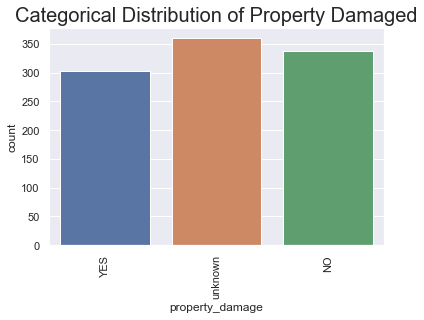

In [27]:
sns.countplot(df['property_damage'])
plt.xticks(rotation = 90)
plt.title("Categorical Distribution of Property Damaged", fontsize = 20)

- Most frauds are reported by people who don't know if they have property damage.

Text(0.5, 1.0, 'Categorical Distribution of Number of vehicles were involved')

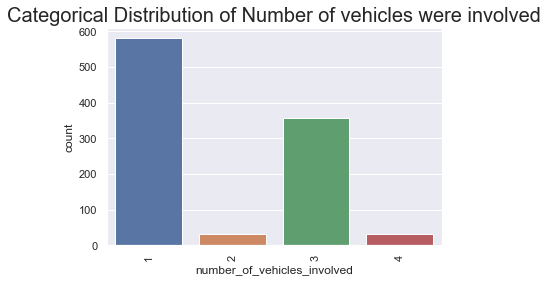

In [28]:
sns.countplot(df['number_of_vehicles_involved'])
plt.xticks(rotation = 90)
plt.title("Categorical Distribution of Number of vehicles were involved", fontsize = 20)

- Most frauds are reported by people who's single vehicle were involved in the fraud.

Text(0.5, 1.0, 'Categorical Distribution of Bodily injuries occured')

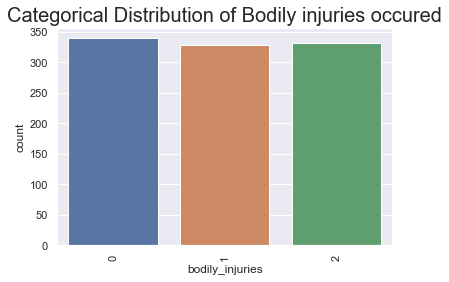

In [29]:
sns.countplot(df['bodily_injuries'])
plt.xticks(rotation = 90)
plt.title("Categorical Distribution of Bodily injuries occured", fontsize = 20)

- Most frauds are reported by people with 0 bodily injuries

Text(0.5, 1.0, 'Categorical Distribution of Witnesses present')

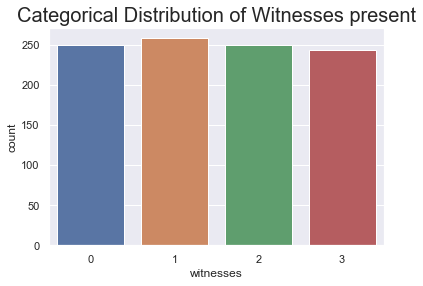

In [30]:
sns.countplot(df['witnesses'])
plt.title("Categorical Distribution of Witnesses present", fontsize = 20)

- Most frauds are reported by people with 1 withness.

Text(0.5, 1.0, 'Categorical Distribution of Police Report Available')

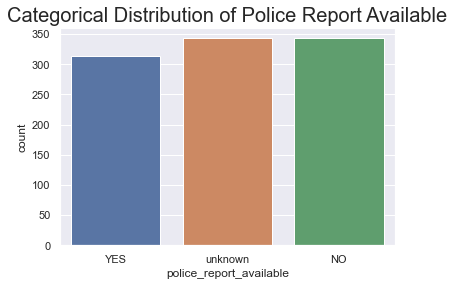

In [31]:
sns.countplot(df['police_report_available'])
plt.title("Categorical Distribution of Police Report Available", fontsize = 20)

- Most frauds are reported by people whose police_report is not available.

Text(0.5, 1.0, 'Categorical Distribution of Vehicle Brand')

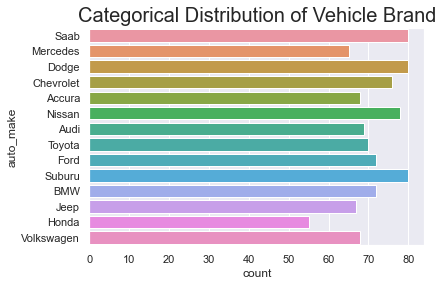

In [32]:
sns.countplot(data = df, y = 'auto_make')
plt.title("Categorical Distribution of Vehicle Brand", fontsize = 20)

- Most frauds are reported by people with Saab or BMW.

Text(0.5, 1.0, 'Categorical Distribution of Vehicle Model')

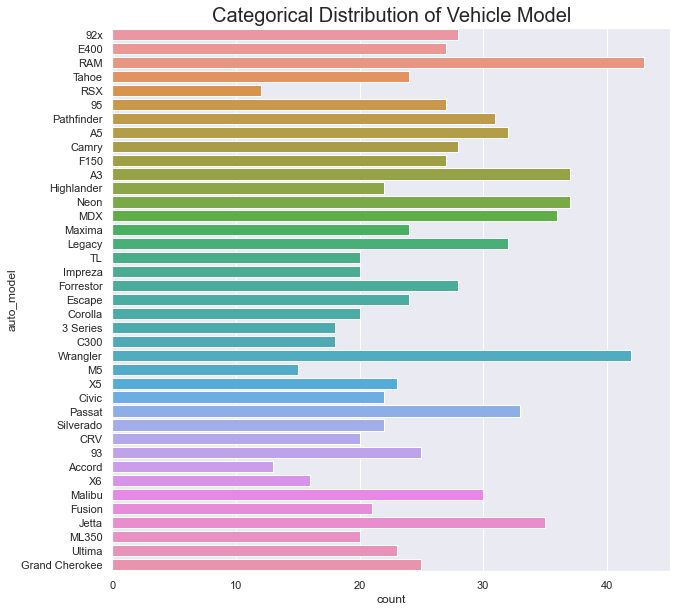

In [33]:
plt.figure(figsize = (10,10))
sns.countplot(data = df, y ='auto_model')
plt.title("Categorical Distribution of Vehicle Model", fontsize = 20)

- Most frauds are reported by people with RAM and Wrangler.

Text(0.5, 1.0, 'Categorical Distribution of Policy CSL')

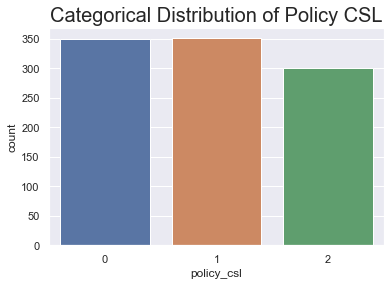

In [34]:
sns.countplot(df['policy_csl'])
plt.title("Categorical Distribution of Policy CSL", fontsize = 20)

- Most frauds are reported by people 1(250/500) policy_csl.

Text(0.5, 1.0, 'Distribution of months_as_customer')

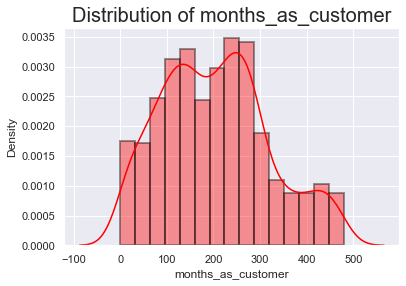

In [35]:
sns.distplot(df['months_as_customer'], color = 'red',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of months_as_customer", fontsize = 20)

Text(0.5, 1.0, 'Distribution of Age')

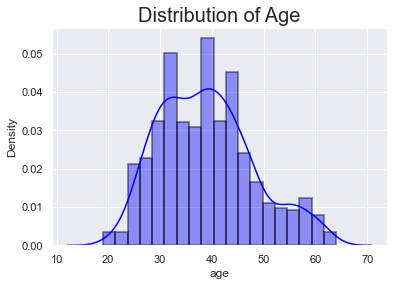

In [36]:
sns.distplot(df['age'], color = 'blue',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of Age", fontsize = 20)

Text(0.5, 1.0, 'Distribution of umbrella_limit')

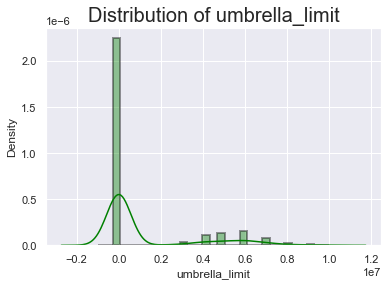

In [37]:
sns.distplot(df['umbrella_limit'], color = 'green',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of umbrella_limit", fontsize = 20)

Text(0.5, 1.0, 'Distribution of policy_annual_premium')

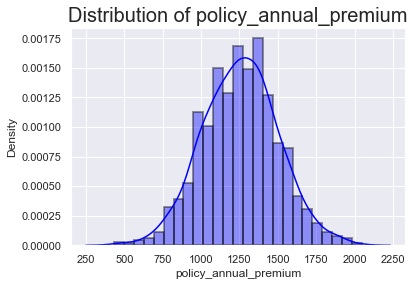

In [38]:
sns.distplot(df['policy_annual_premium'], color = 'blue',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of policy_annual_premium", fontsize = 20)

Text(0.5, 1.0, 'Distribution of policy_deductable')

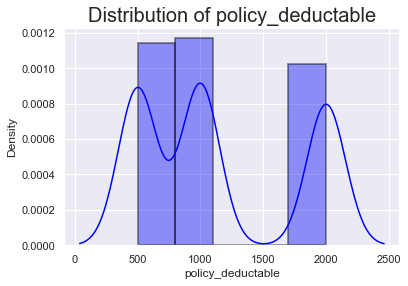

In [39]:
sns.distplot(df['policy_deductable'], color = 'blue',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of policy_deductable", fontsize = 20)

Text(0.5, 1.0, 'Distribution of capital-gains')

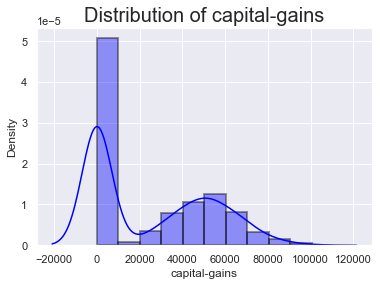

In [40]:
sns.distplot(df['capital-gains'], color = 'blue',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of capital-gains", fontsize = 20)

Text(0.5, 1.0, 'Distribution of capital-loss')

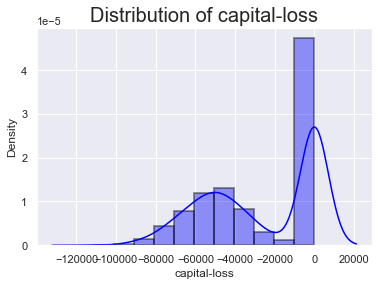

In [41]:
sns.distplot(df['capital-loss'], color = 'blue',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of capital-loss", fontsize = 20)

Text(0.5, 1.0, 'Distribution of incident_hour_of_the_day')

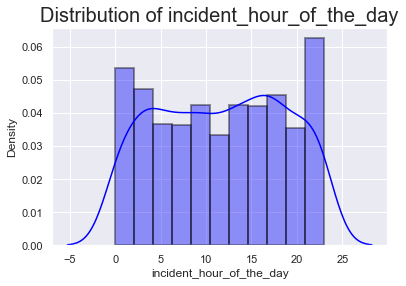

In [42]:
sns.distplot(df['incident_hour_of_the_day'], color = 'blue',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of incident_hour_of_the_day", fontsize = 20)

Text(0.5, 1.0, 'Distribution of total_claim_amount')

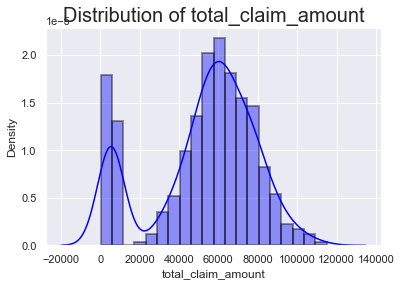

In [43]:
sns.distplot(df['total_claim_amount'], color = 'blue',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of total_claim_amount", fontsize = 20)

Text(0.5, 1.0, 'Distribution of injury_claim')

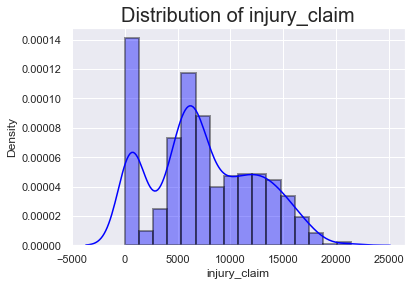

In [44]:
sns.distplot(df['injury_claim'], color = 'blue',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of injury_claim", fontsize = 20)

Text(0.5, 1.0, 'Distribution of vehicle_claim')

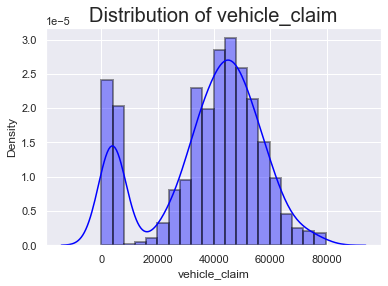

In [45]:
sns.distplot(df['vehicle_claim'], color = 'blue',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of vehicle_claim", fontsize = 20)

Text(0.5, 1.0, 'Distribution of property_claim')

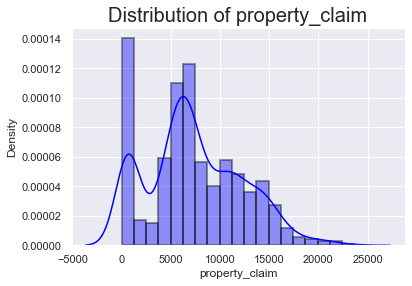

In [46]:
sns.distplot(df['property_claim'], color = 'blue',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of property_claim", fontsize = 20)

### Bivariate Analysis

Text(0.5, 1.0, 'Distribution of Insurance Fraud over Gender')

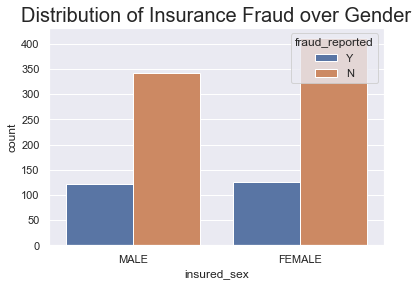

In [47]:
sns.countplot(data = df, x = 'insured_sex', hue = 'fraud_reported')
plt.title("Distribution of Insurance Fraud over Gender", fontsize = 20)

- Both genders have reported for insurance fraud equally.

Text(0.5, 1.0, 'Distribution of Insurance Fraud over Insured Education Level')

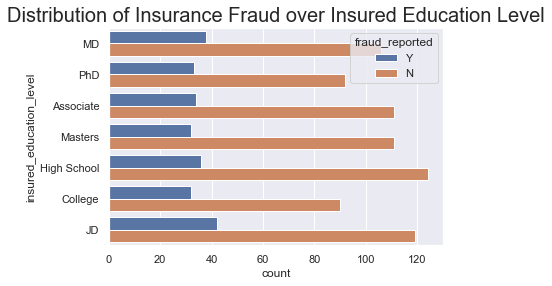

In [48]:
sns.countplot(data = df, y = 'insured_education_level', hue = 'fraud_reported')
plt.title("Distribution of Insurance Fraud over Insured Education Level", fontsize = 20)

- People who have JD have reported frauds more in our Dataset.

Text(0.5, 1.0, 'Distribution of Insurance Fraud over Insured Occupation')

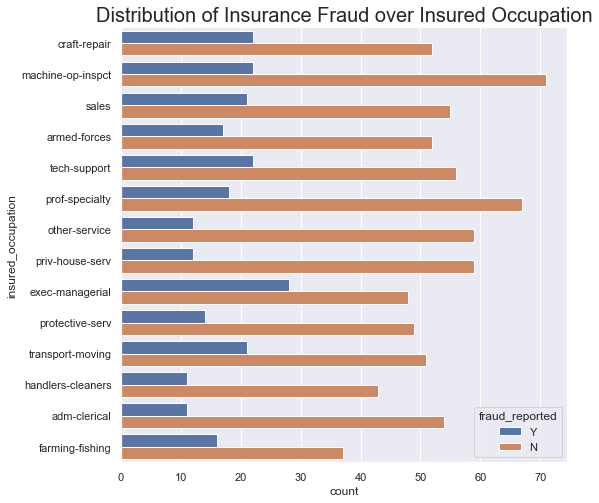

In [49]:
plt.figure(figsize = (8,8))
sns.countplot(data = df, y = 'insured_occupation', hue = 'fraud_reported')
plt.title("Distribution of Insurance Fraud over Insured Occupation", fontsize = 20)

- People who are exec-managerial have reported frauds more in our dataset

Text(0.5, 1.0, 'Distribution of Insurance Fraud over Insured Relationship')

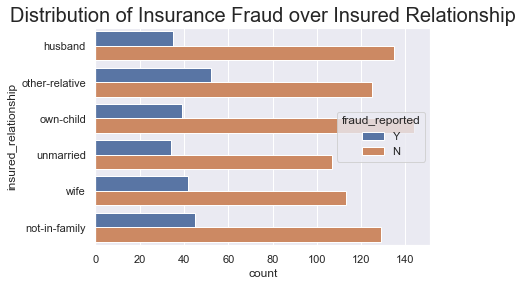

In [50]:
sns.countplot(data = df, y = 'insured_relationship', hue = 'fraud_reported')
plt.title("Distribution of Insurance Fraud over Insured Relationship", fontsize = 20)

- People who've other relatives of insured have reported frauds majorly.

Text(0.5, 1.0, 'Distribution of Insurance Fraud over Incident Type')

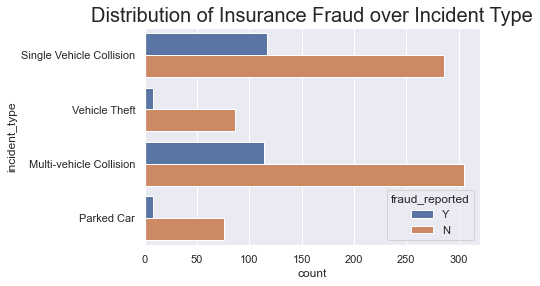

In [51]:
sns.countplot(data = df, y = 'incident_type', hue = 'fraud_reported')
plt.title("Distribution of Insurance Fraud over Incident Type", fontsize = 20)

- People who own a single vehicle have reported more frauds.

Text(0.5, 1.0, 'Distribution of Insurance Fraud over Collision Type')

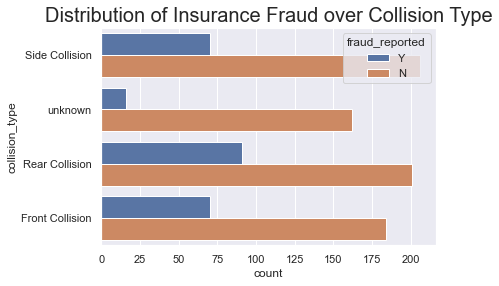

In [52]:
sns.countplot(data = df, y = 'collision_type', hue = 'fraud_reported')
plt.title("Distribution of Insurance Fraud over Collision Type", fontsize = 20)

- People who met with Rear-collision have reported more frauds.

Text(0.5, 1.0, 'Distribution of Insurance Fraud over Incident Severity')

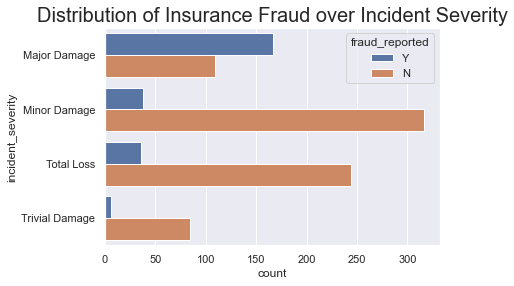

In [53]:
sns.countplot(data = df, y = 'incident_severity', hue = 'fraud_reported')
plt.title("Distribution of Insurance Fraud over Incident Severity", fontsize = 20)

- People with Major Damage have reported more frauds.

Text(0.5, 1.0, 'Distribution of Insurance Fraud over Incident State')

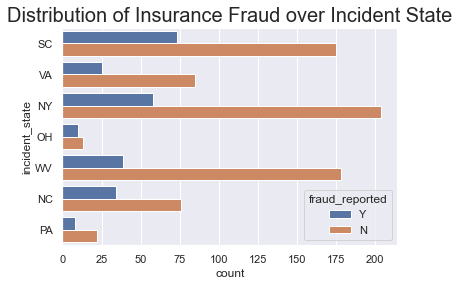

In [54]:
sns.countplot(data = df, y = 'incident_state', hue = 'fraud_reported')
plt.title("Distribution of Insurance Fraud over Incident State", fontsize = 20)

- People from South Carolina have reported more frauds.

Text(0.5, 1.0, 'Distribution of Insurance Fraud over Incident City')

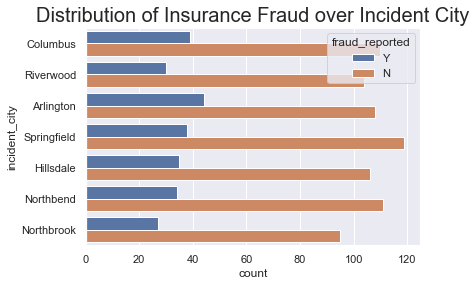

In [55]:
sns.countplot(data = df, y = 'incident_city', hue = 'fraud_reported')
plt.title("Distribution of Insurance Fraud over Incident City", fontsize = 20)

- People from Arlington have reported more frauds.

Text(0.5, 1.0, 'Distribution of Insurance Fraud over Authorities Contacted')

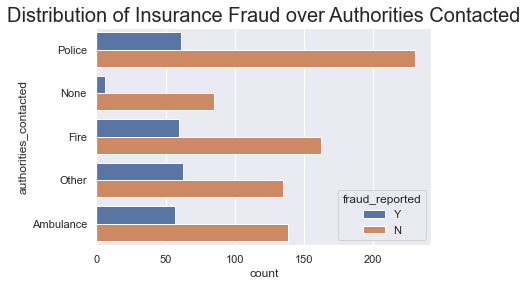

In [56]:
sns.countplot(data = df, y = 'authorities_contacted', hue = 'fraud_reported')
plt.title("Distribution of Insurance Fraud over Authorities Contacted", fontsize = 20)

- People who have contacted other authorities have reported more frauds.

Text(0.5, 1.0, 'Distribution of Insurance Fraud over Number of vehicles involved')

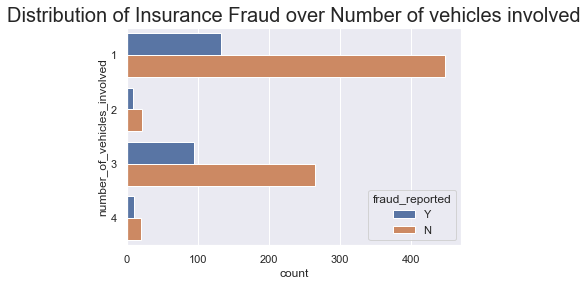

In [57]:
sns.countplot(data = df, y = 'number_of_vehicles_involved', hue = 'fraud_reported')
plt.title("Distribution of Insurance Fraud over Number of vehicles involved", fontsize = 20)

- People with one vehicle involved have reported more frauds.

Text(0.5, 1.0, 'Distribution of Insurance Fraud over Bodily injuries')

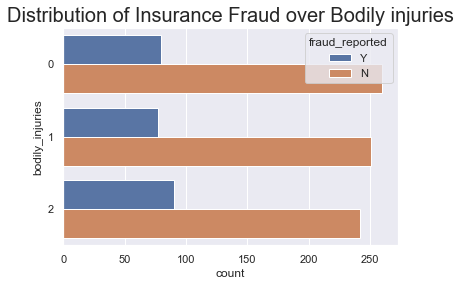

In [58]:
sns.countplot(data = df, y = 'bodily_injuries', hue = 'fraud_reported')
plt.title("Distribution of Insurance Fraud over Bodily injuries", fontsize = 20)

- People with 2 bodily injuries have reported more frauds.

Text(0.5, 1.0, 'Distribution of Insurance Fraud over Number of witnesses present')

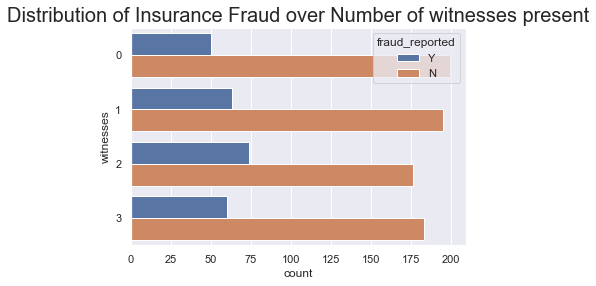

In [59]:
sns.countplot(data = df, y = 'witnesses', hue = 'fraud_reported')
plt.title("Distribution of Insurance Fraud over Number of witnesses present", fontsize = 20)

- People with 2 witnesses have reported more frauds.

Text(0.5, 1.0, 'Distribution of Insurance Fraud over Vehicle Brand')

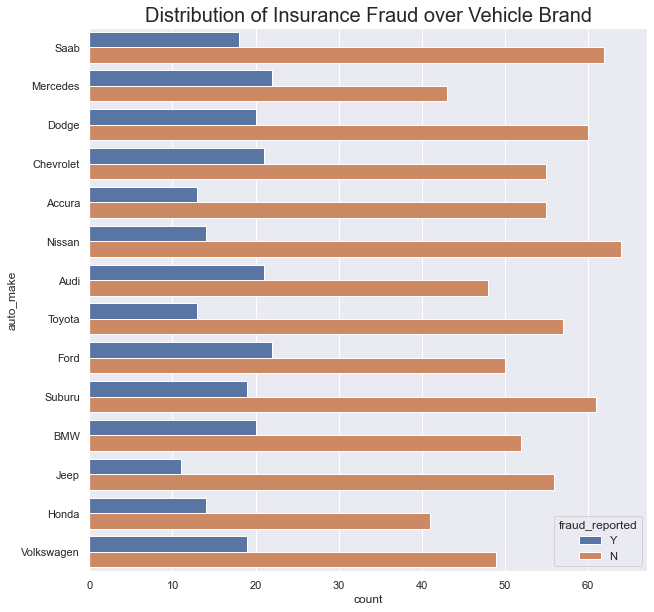

In [60]:
plt.figure(figsize = (10,10))
sns.countplot(data = df, y = 'auto_make', hue = 'fraud_reported')
plt.title("Distribution of Insurance Fraud over Vehicle Brand", fontsize = 20)

Text(0.5, 1.0, 'Distribution of Insurance Fraud over Vehicle Model')

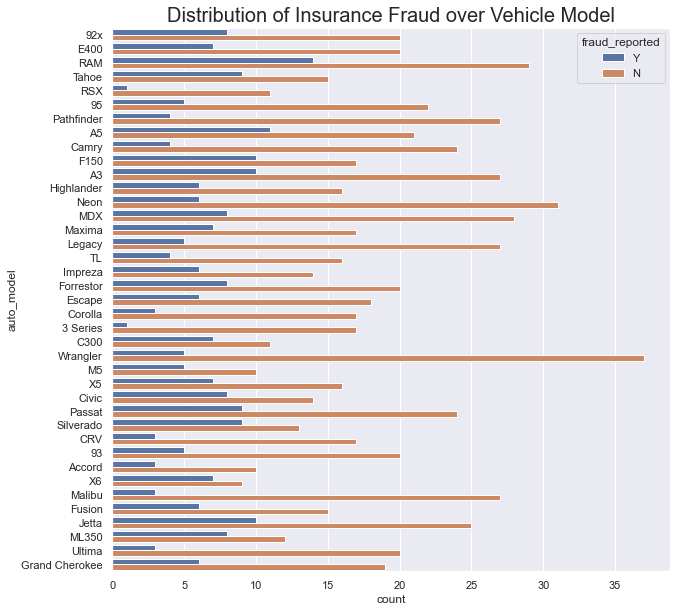

In [61]:
plt.figure(figsize = (10,10))
sns.countplot(data = df, y = 'auto_model', hue = 'fraud_reported')
plt.title("Distribution of Insurance Fraud over Vehicle Model", fontsize = 20)

- People owning a RAM have reported more frauds.

Text(0.5, 1.0, 'Distribution of Insurance Fraud over Vehicle Year')

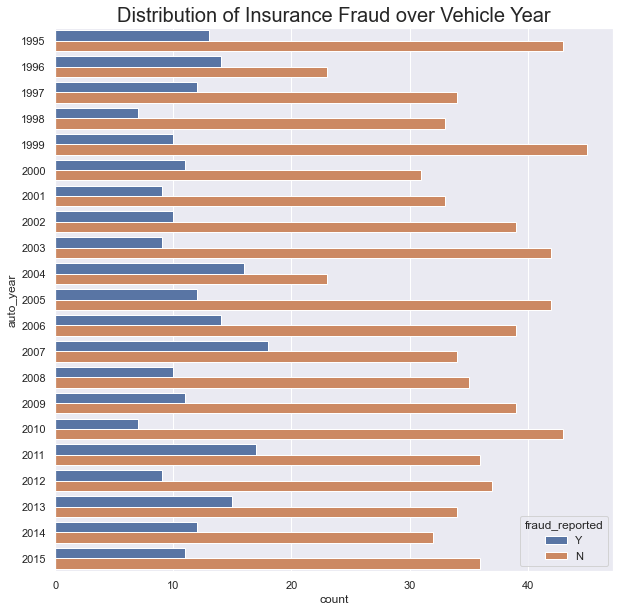

In [62]:
plt.figure(figsize = (10,10))
sns.countplot(data = df, y = 'auto_year', hue = 'fraud_reported')
plt.title("Distribution of Insurance Fraud over Vehicle Year", fontsize = 20)

- People owning vehicle from 2007 have reported more frauds.

Text(0.5, 1.0, 'Correlation of Total_claim_amount and injury_claim')

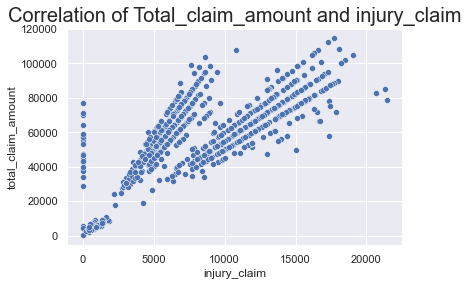

In [63]:
sns.scatterplot(data = df, x = 'injury_claim', y = 'total_claim_amount')
plt.title("Correlation of Total_claim_amount and injury_claim", fontsize = 20)

- There's a positive Correlation between Total_claim_amount and injury_claim.

Text(0.5, 1.0, 'Correlation of Total_claim_amount and property_claim')

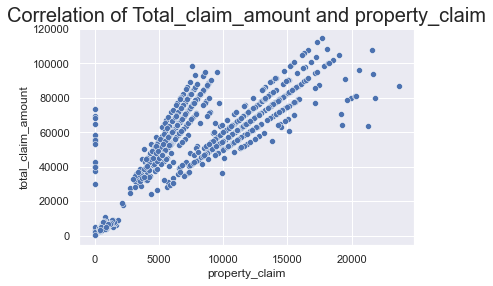

In [64]:
sns.scatterplot(data = df, x = 'property_claim', y = 'total_claim_amount')
plt.title("Correlation of Total_claim_amount and property_claim", fontsize = 20)

- There's a positive Correlation between Total_claim_amount and property_claim.

Text(0.5, 1.0, 'Correlation of Total_claim_amount and vehicle_claim')

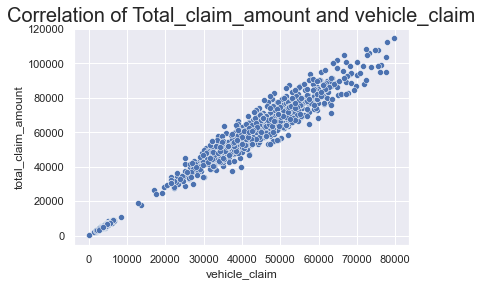

In [65]:
sns.scatterplot(data = df, x = 'vehicle_claim', y = 'total_claim_amount')
plt.title("Correlation of Total_claim_amount and vehicle_claim", fontsize = 20)

- There's a positive Correlation between Total_claim_amount and vehicle_claim.

Text(0.5, 1.0, 'Correlation of property_claim and vehicle_claim')

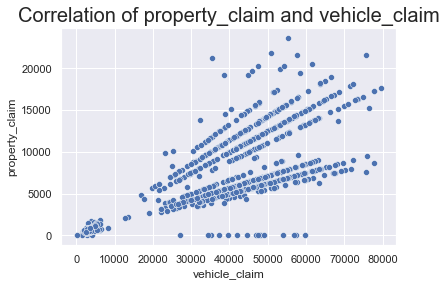

In [66]:
sns.scatterplot(data = df, x = 'vehicle_claim', y = 'property_claim')
plt.title("Correlation of property_claim and vehicle_claim", fontsize = 20)

- There's a positive Correlation between propety_claim and vehicle_claim.

### Multivariate Analysis

<AxesSubplot:xlabel='incident_Year', ylabel='Count'>

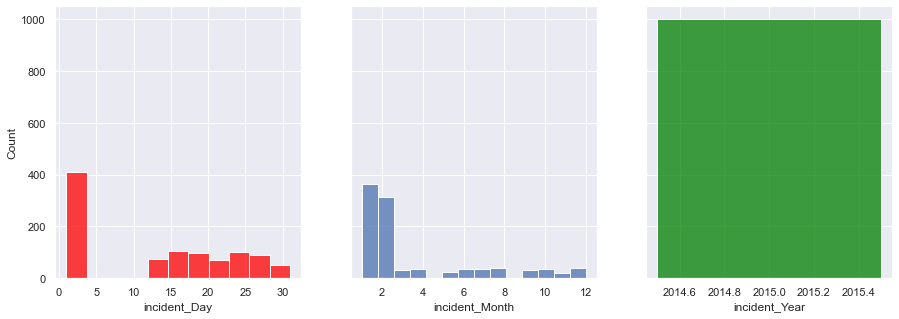

In [67]:
#Visualizing Normal distribution and dispersion of columns using histogram
#Multivariate Analysis

fig, ax = plt.subplots(1,3, sharey = True, figsize = (15,5))

sns.histplot(df['incident_Day'], ax = ax[0], color = 'red')
sns.histplot(df['incident_Month'], ax = ax[1])
sns.histplot(df['incident_Year'], ax = ax[2], color = 'green')

<AxesSubplot:xlabel='policy_bind_Year', ylabel='Count'>

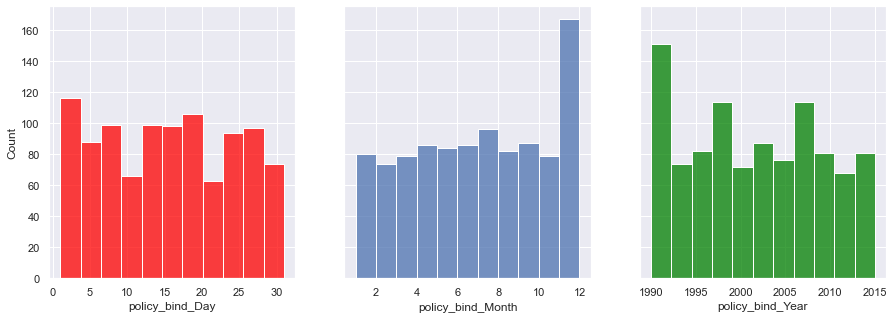

In [68]:
#Visualizing Normal distribution and dispersion of columns using histogram
#Multivariate Analysis

fig, ax = plt.subplots(1,3, sharey = True, figsize = (15,5))

sns.histplot(df['policy_bind_Day'], ax = ax[0], color = 'red')
sns.histplot(df['policy_bind_Month'], ax = ax[1])
sns.histplot(df['policy_bind_Year'], ax = ax[2], color = 'green')

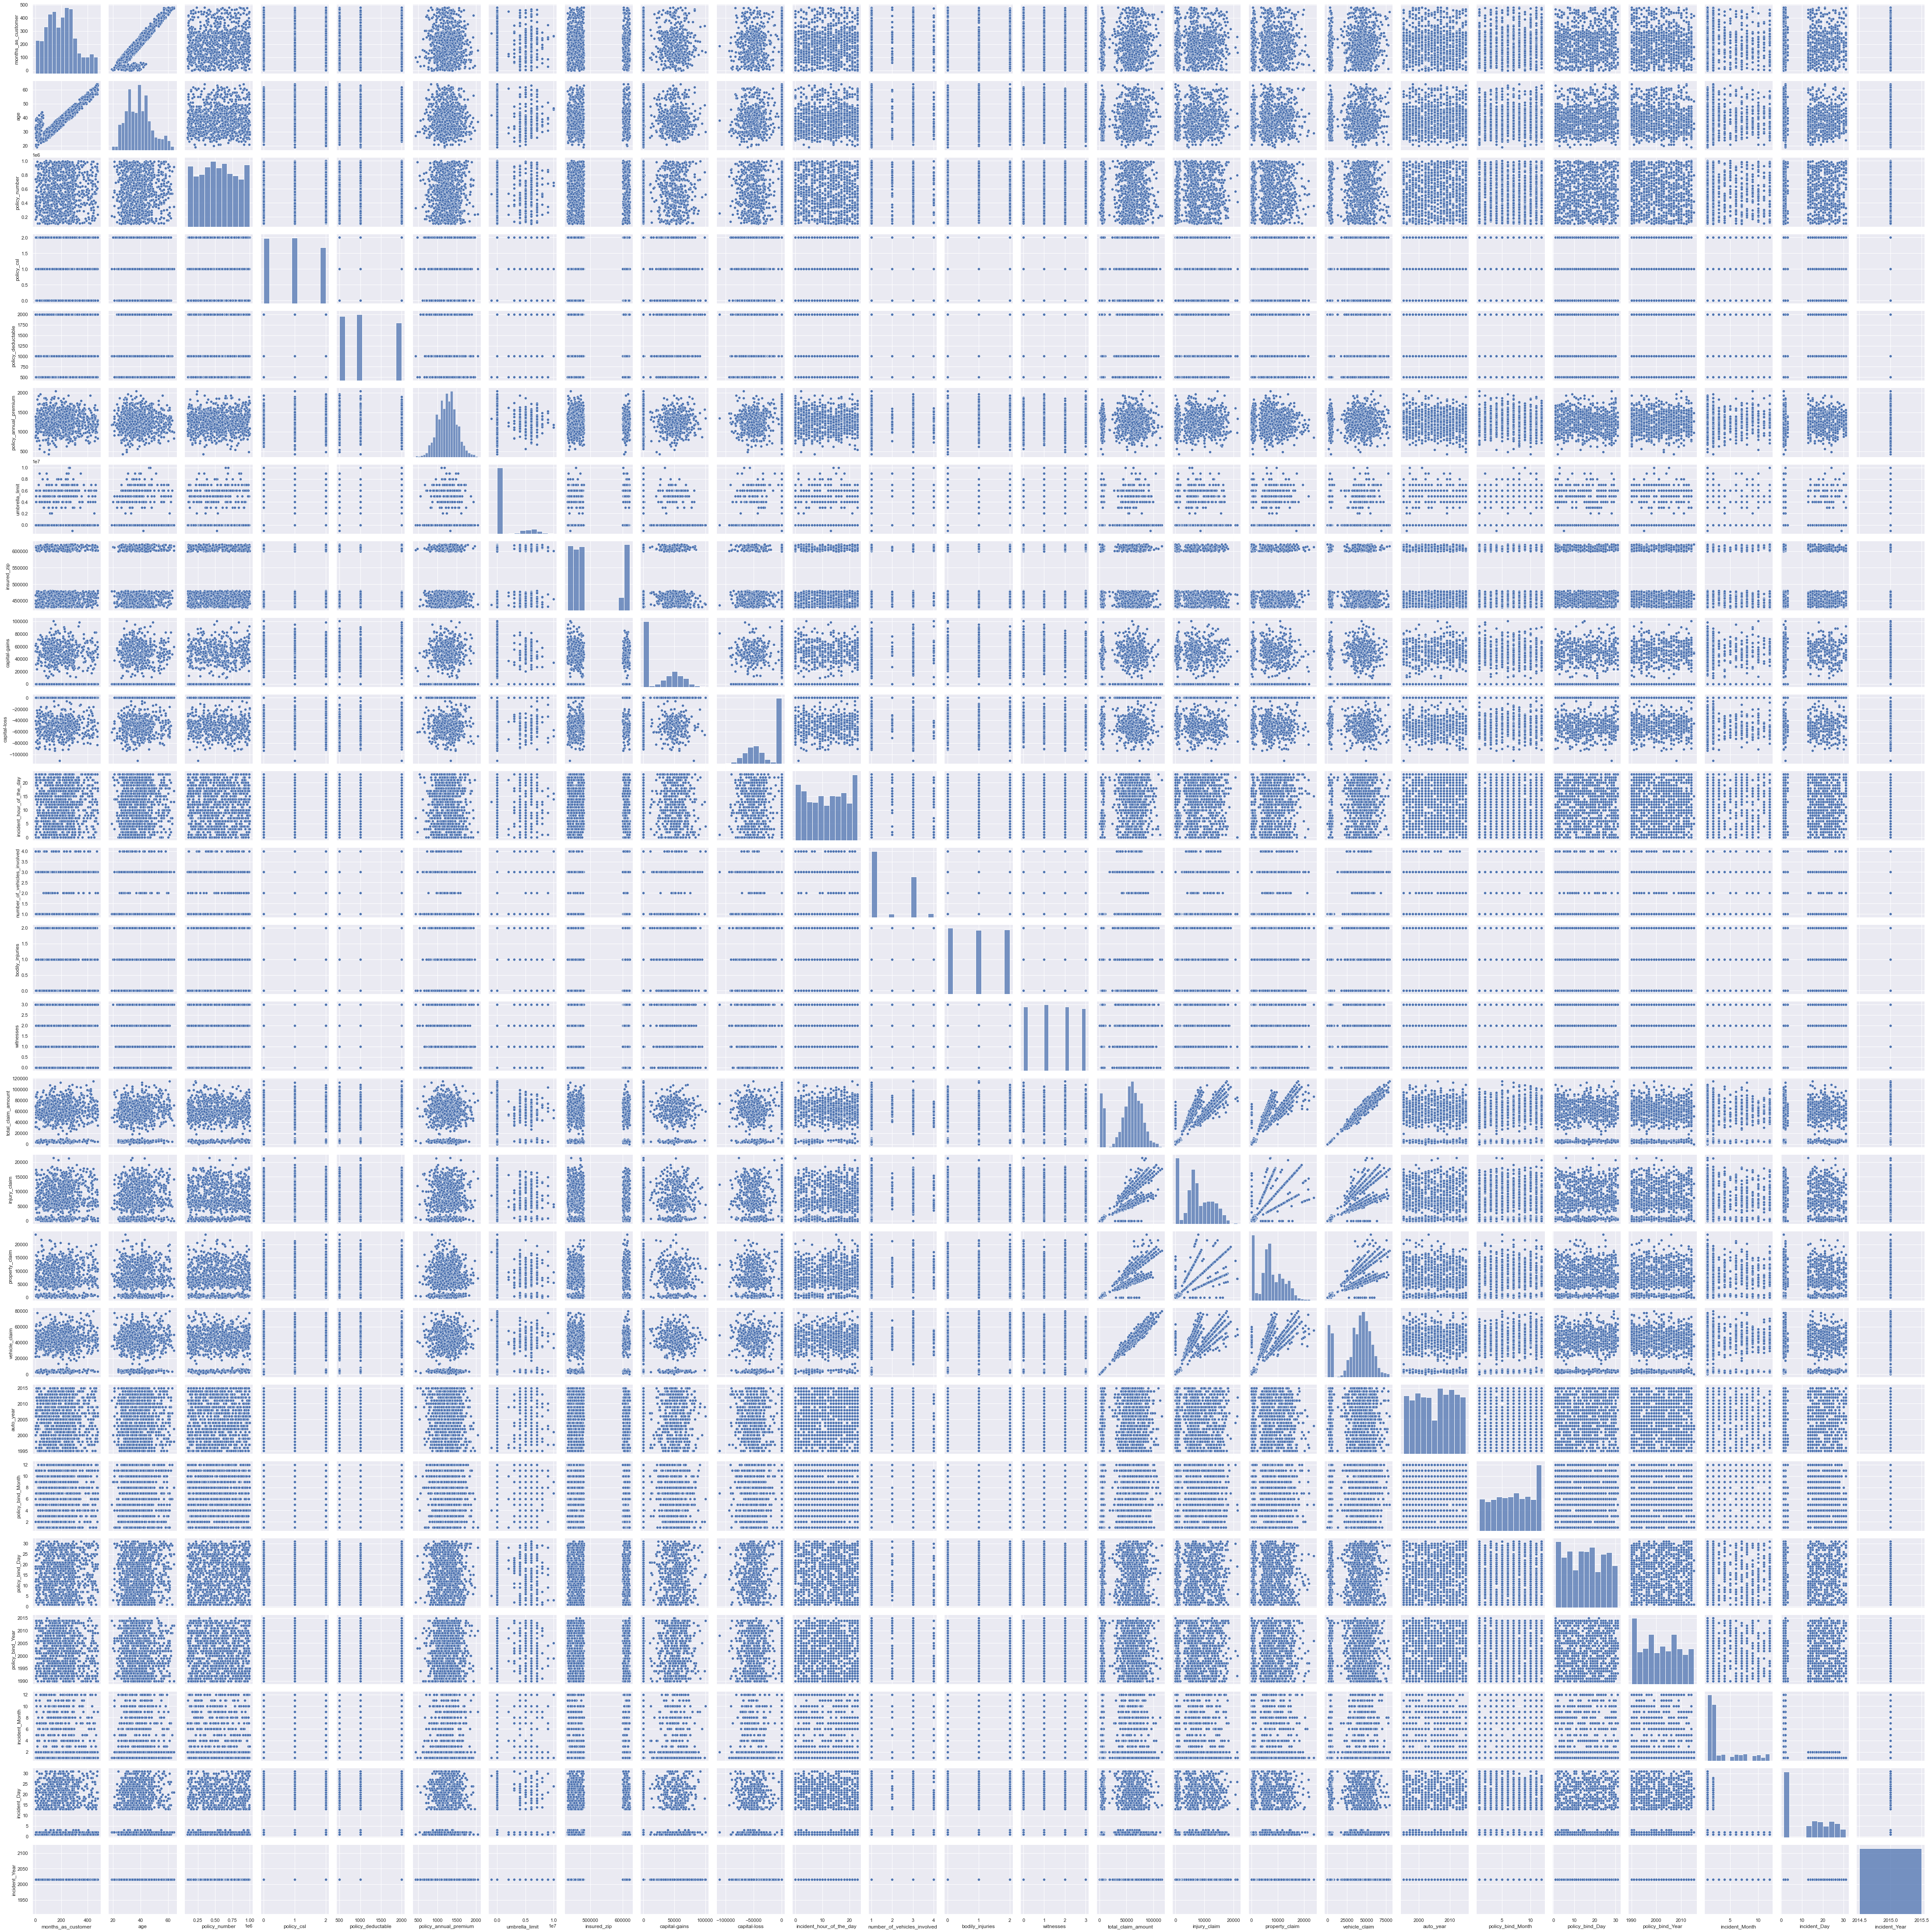

In [69]:
sns.pairplot(df)

- High posive correlation between Total_claim_amount and injury_claim, vehicle_claim, property_claim.
- Positive correlation between injury claim and total_claim_amount, vehicle_claim.
- Positive correlation between property claim and total_claim_amount, vehicle_claim.
- Positive correlation between vehicle claim and total_claim_amount, property_claim.

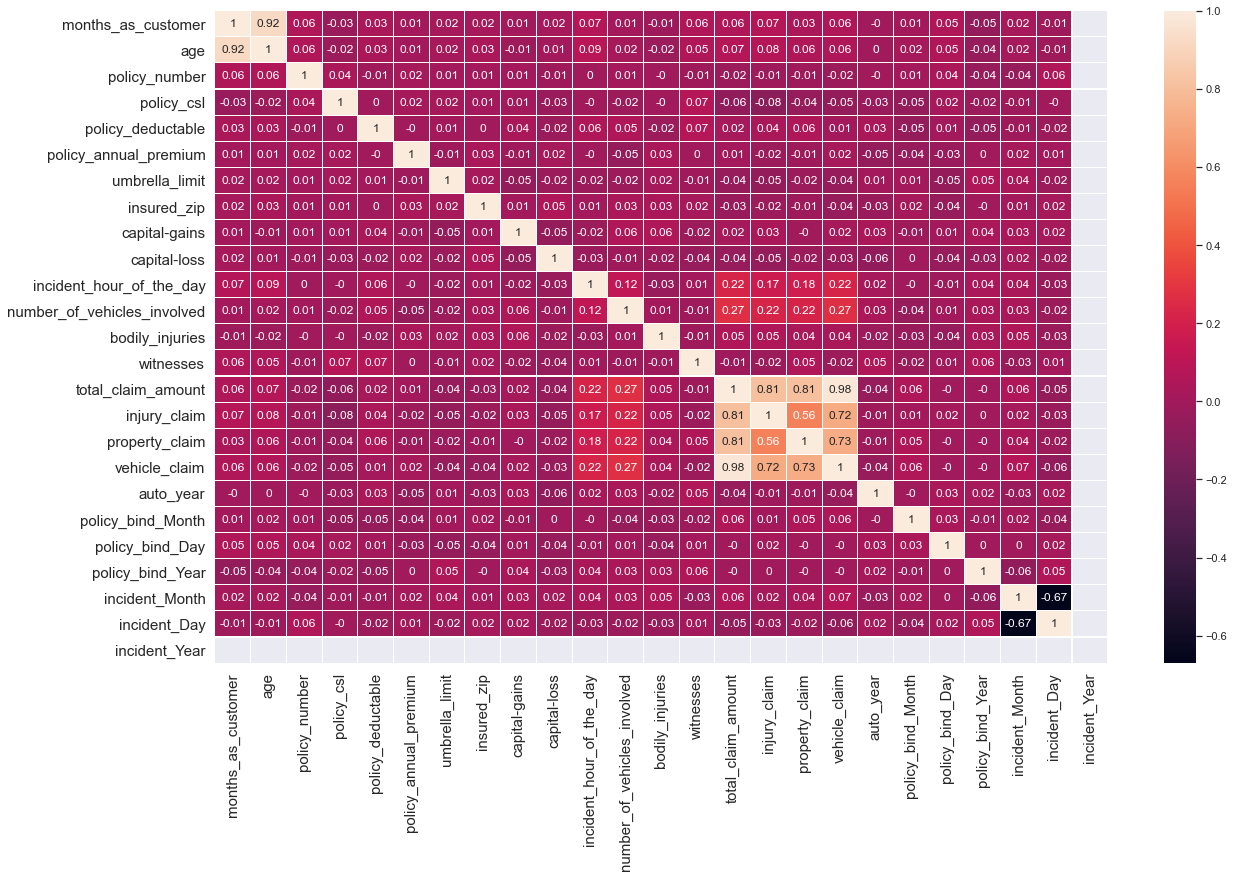

In [70]:
#plotting correlation table
plt.figure(figsize = [20,12])
sns.heatmap(round(df.corr(),2), annot = True,linewidths=0.1,fmt = '.5g' )
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

- High posive correlation between Total_claim_amount and injury_claim, vehicle_claim, property_claim.
- Positive correlation between injury claim and total_claim_amount, vehicle_claim.
- Positive correlation between property claim and total_claim_amount, vehicle_claim.
- Positive correlation between vehicle claim and total_claim_amount, property_claim.

__Encoding Categorical Features Using Label Encoder__

In [71]:
#Instantiating Label Encoder
enc = LabelEncoder()

In [72]:
#Encoding all our Categorical Data

df['policy_state'] = enc.fit_transform(df['policy_state']) 
df['insured_sex'] = enc.fit_transform(df['insured_sex']) 
df['insured_education_level'] = enc.fit_transform(df['insured_education_level']) 
df['insured_occupation'] = enc.fit_transform(df['insured_occupation']) 
df['insured_hobbies'] = enc.fit_transform(df['insured_hobbies']) 
df['insured_relationship'] = enc.fit_transform(df['insured_relationship'])
df['collision_type'] = enc.fit_transform(df['collision_type']) 
df['incident_severity'] = enc.fit_transform(df['incident_severity']) 
df['authorities_contacted'] = enc.fit_transform(df['authorities_contacted']) 
df['incident_type'] = enc.fit_transform(df['incident_type']) 
df['incident_state'] = enc.fit_transform(df['incident_state']) 
df['incident_city'] = enc.fit_transform(df['incident_city']) 
df['property_damage'] = enc.fit_transform(df['property_damage'])
df['police_report_available'] = enc.fit_transform(df['police_report_available']) 
df['auto_make'] = enc.fit_transform(df['auto_make']) 
df['auto_model'] = enc.fit_transform(df['auto_model']) 
df['fraud_reported'] = enc.fit_transform(df['fraud_reported']) 

In [73]:
# Splitting our dataset in features and target 
X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

__Oversampling using SMOTE__

Text(0.5, 1.0, 'Visualising Class Imbalance')

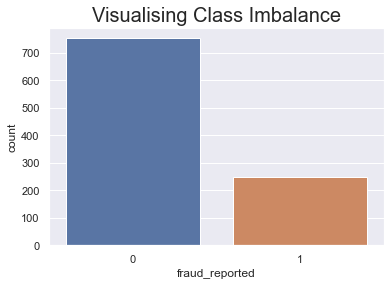

In [74]:
sns.countplot(y)
plt.title("Visualising Class Imbalance", fontsize = 20)

In [75]:
#instantiating and fitting Smote
sm = SMOTE()
X_smote, y_smote = sm.fit_resample(X,y)

In [76]:
#print Count of class before oversampling and after oversampling
print('Before SMOTE : ',Counter(y))
print('After SMOTE : ',Counter(y_smote))

Before SMOTE :  Counter({0: 753, 1: 247})
After SMOTE :  Counter({1: 753, 0: 753})


Text(0.5, 1.0, 'After using Smote')

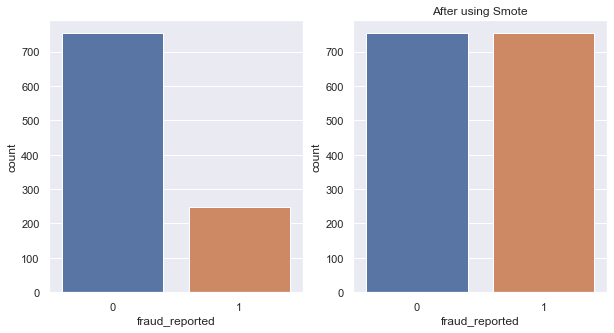

In [77]:
#Visualising class imbalance and after using smote

fig, ax = plt.subplots(1,2, figsize = (10,5),)

sns.countplot(y, ax =ax [0])
plt.title("Before using Smote")

sns.countplot(y_smote, ax =ax[1])
plt.title("After using Smote")

### Logistic Regression

In [79]:
#Finding Random state using LogisticRegression
maxAccu=0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.2,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on random_state",maxRS)

Best accuracy is 0.652317880794702 on random_state 104


### Decision Tree Classifier

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size = 0.2, random_state = 104)

In [81]:
#Instantiating Decision Tree model and training it
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [82]:
# Performing Evaluation metrics for our model
preddt=DT.predict(X_test)
print('Accuracy Score for Decision Treee is :',round(accuracy_score(y_test,preddt),4)*100,'% \n')
print('Confusion Matrix of Decision Tree: \n',confusion_matrix(y_test,preddt), '\n')
print('Classification Decision Tree: \n',classification_report(y_test,preddt))

Accuracy Score for Decision Treee is : 82.12 % 

Confusion Matrix of Decision Tree: 
 [[129  29]
 [ 25 119]] 

Classification Decision Tree: 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       158
           1       0.80      0.83      0.82       144

    accuracy                           0.82       302
   macro avg       0.82      0.82      0.82       302
weighted avg       0.82      0.82      0.82       302



array([[129,  29],
       [ 25, 119]], dtype=int64)

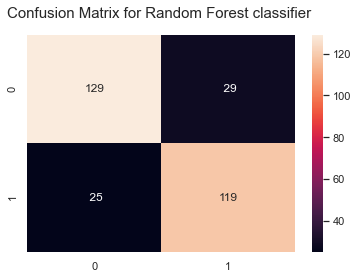

In [83]:
cm = confusion_matrix(y_test,preddt)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,preddt),annot=True,fmt='3.0f')
plt.title('Confusion Matrix for Random Forest classifier ', y=1.05, size=15)
cm

### Random Forest Classifier

In [84]:
#Model instantiating and traaining it
RF = RandomForestClassifier()
RF.fit(X_train,y_train)


RandomForestClassifier()

In [85]:
# Performing Evaluation metrics for our model
predrf=RF.predict(X_test)
print('Accuracy Score for Random Forest Classifier is :',round(accuracy_score(y_test,predrf),4)*100,'% \n')
print('Confusion Matrix of Random Forest Classifier : \n',confusion_matrix(y_test,predrf), '\n')
print('Classification Random Forest Classifier : \n',classification_report(y_test,predrf))

Accuracy Score for Random Forest Classifier is : 87.75 % 

Confusion Matrix of Random Forest Classifier : 
 [[139  19]
 [ 18 126]] 

Classification Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       158
           1       0.87      0.88      0.87       144

    accuracy                           0.88       302
   macro avg       0.88      0.88      0.88       302
weighted avg       0.88      0.88      0.88       302



array([[139,  19],
       [ 18, 126]], dtype=int64)

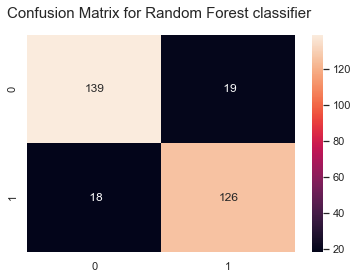

In [86]:
cm = confusion_matrix(y_test,predrf)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,predrf),annot=True,fmt='3.0f')
plt.title('Confusion Matrix for Random Forest classifier ', y=1.05, size=15)
cm

### Gradient Boosting Classifier

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

In [88]:
#Instantiating model and training it

grad = GradientBoostingClassifier()
grad.fit(X_train,y_train)

GradientBoostingClassifier()

In [89]:
# Performing Evaluation metrics for our model
gradpred=grad.predict(X_test)
print('Accuracy Score for SVC is :',round(accuracy_score(y_test,gradpred),4)*100,'% \n')
print('Confusion Matrix of SVC: \n',confusion_matrix(y_test,gradpred), '\n')
print('Classification SVC: \n',classification_report(y_test,gradpred))

Accuracy Score for SVC is : 84.77 % 

Confusion Matrix of SVC: 
 [[135  23]
 [ 23 121]] 

Classification SVC: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       158
           1       0.84      0.84      0.84       144

    accuracy                           0.85       302
   macro avg       0.85      0.85      0.85       302
weighted avg       0.85      0.85      0.85       302



array([[135,  23],
       [ 23, 121]], dtype=int64)

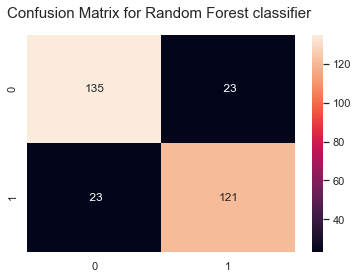

In [90]:
cm = confusion_matrix(y_test,gradpred)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,gradpred),annot=True,fmt='3.0f')
plt.title('Confusion Matrix for Random Forest classifier ', y=1.05, size=15)
cm

### K Nearest Neighbors

In [91]:
#Instantiating KnN model and training it
knn = KNeighborsClassifier() 
knn.fit(X_train, y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

79.32

In [92]:
# Performing Evaluation metrics for our model
knnpred=knn.predict(X_test)
print('Accuracy Score for KNN is :',round(accuracy_score(y_test,knnpred),4)*100,'% \n')
print('Confusion Matrix of KNN: \n',confusion_matrix(y_test,knnpred), '\n')
print('Classification KNN: \n',classification_report(y_test,knnpred))


Accuracy Score for KNN is : 66.56 % 

Confusion Matrix of KNN: 
 [[ 81  77]
 [ 24 120]] 

Classification KNN: 
               precision    recall  f1-score   support

           0       0.77      0.51      0.62       158
           1       0.61      0.83      0.70       144

    accuracy                           0.67       302
   macro avg       0.69      0.67      0.66       302
weighted avg       0.69      0.67      0.66       302



array([[ 81,  77],
       [ 24, 120]], dtype=int64)

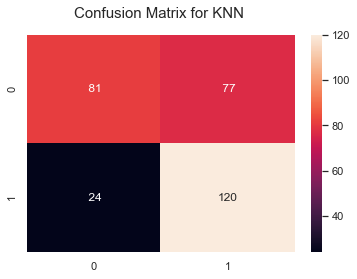

In [93]:
cm = confusion_matrix(y_test,knnpred)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,knnpred),annot=True,fmt='3.0f',cmap="rocket")
plt.title('Confusion Matrix for KNN ', y=1.05, size=15)
cm


### Adaboost Classifier

In [94]:
#Instantiating model and fitting model

adaboost = AdaBoostClassifier()
adaboost.fit(X_train,y_train)

AdaBoostClassifier()

In [95]:
# Performing Evaluation metrics for our model
predada=adaboost.predict(X_test)
print('Accuracy Score for AdaBoost is :',round(accuracy_score(y_test,predada),4)*100,'% \n')
print('Confusion Matrix of AdaBoost : \n',confusion_matrix(y_test,predada), '\n')
print('Classification AdaBoost : \n',classification_report(y_test,predada))

Accuracy Score for AdaBoost is : 83.77 % 

Confusion Matrix of AdaBoost : 
 [[134  24]
 [ 25 119]] 

Classification AdaBoost : 
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       158
           1       0.83      0.83      0.83       144

    accuracy                           0.84       302
   macro avg       0.84      0.84      0.84       302
weighted avg       0.84      0.84      0.84       302



array([[134,  24],
       [ 25, 119]], dtype=int64)

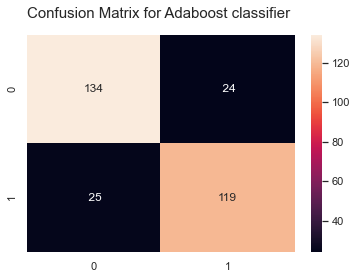

In [96]:
cm = confusion_matrix(y_test,predada)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,predada),annot=True,fmt='3.0f',cmap="rocket")
plt.title('Confusion Matrix for Adaboost classifier ', y=1.05, size=15)
cm

### Bagging Classifier

In [97]:
from sklearn.ensemble import BaggingClassifier

In [98]:
#Instantiating model and fitting model

BG = BaggingClassifier()
BG.fit(X_train,y_train)

BaggingClassifier()

In [99]:
# Performing Evaluation metrics for our model
predbg=BG.predict(X_test)
print('Accuracy Score for Bagging Classifier is :',round(accuracy_score(y_test,predbg),4)*100,'% \n')
print('Confusion Matrix of Bagging Classifier is : \n',confusion_matrix(y_test,predbg), '\n')
print('Classification  for Bagging Classifier : \n',classification_report(y_test,predbg))

Accuracy Score for Bagging Classifier is : 85.76 % 

Confusion Matrix of Bagging Classifier is : 
 [[139  19]
 [ 24 120]] 

Classification  for Bagging Classifier : 
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       158
           1       0.86      0.83      0.85       144

    accuracy                           0.86       302
   macro avg       0.86      0.86      0.86       302
weighted avg       0.86      0.86      0.86       302



array([[139,  19],
       [ 24, 120]], dtype=int64)

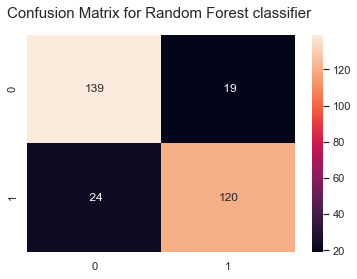

In [100]:
cm = confusion_matrix(y_test,predbg)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,predbg),annot=True,fmt='3.0f',cmap="rocket")
plt.title('Confusion Matrix for Random Forest classifier ', y=1.05, size=15)
cm

### XGB Classifier

In [101]:
from xgboost import XGBClassifier


In [102]:
#Instantiating model and fitting model

xgb = XGBClassifier()
xgb.fit(X_train,y_train)

[14:42:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [103]:
# Performing Evaluation metrics for our model
xgbpred=xgb.predict(X_test)
print('Accuracy Score for XGB Classifier is :',round(accuracy_score(y_test,xgbpred),4)*100,'% \n')
print('Confusion Matrix of XGB Classifier is : \n',confusion_matrix(y_test,xgbpred), '\n')
print('Classification  for XGB Classifier : \n',classification_report(y_test,xgbpred))

Accuracy Score for XGB Classifier is : 87.42 % 

Confusion Matrix of XGB Classifier is : 
 [[137  21]
 [ 17 127]] 

Classification  for XGB Classifier : 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       158
           1       0.86      0.88      0.87       144

    accuracy                           0.87       302
   macro avg       0.87      0.87      0.87       302
weighted avg       0.87      0.87      0.87       302



array([[137,  21],
       [ 17, 127]], dtype=int64)

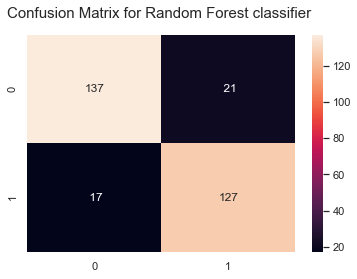

In [104]:
cm = confusion_matrix(y_test,xgbpred)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,xgbpred),annot=True,fmt='3.0f',cmap="rocket")
plt.title('Confusion Matrix for Random Forest classifier ', y=1.05, size=15)
cm

#### Evaluation using Cross Validation Scores

In [105]:
CVscore_LR = cross_val_score(LR,X_smote,y_smote,cv = 10 )
print("Cross validation score of Logistic Regression is :", round(CVscore_LR.mean(),4)*100,'%')

CVscore_DT = cross_val_score(DT,X_smote,y_smote,cv = 10 )
print("Cross validation score of Decision Tree is :", round(CVscore_DT.mean(),4)*100,'%')

CVscore_Knn = cross_val_score(knn,X_smote,y_smote,cv = 10 )
print("Cross validation score of KNeighbors Classifier :", round(CVscore_Knn.mean(),4)*100,'%')

CVscore_RF = cross_val_score(RF,X_smote,y_smote,cv = 10 )
print("Cross validation score of Random Forest Classifier :", round(CVscore_RF.mean(),4)*100,'%')

CVscore_grad = cross_val_score(grad,X_smote,y_smote,cv = 10 )
print("Cross validation score of Gradient Boosting Classifier is :",round(CVscore_grad.mean(),4)*100,'%')

CVscore_adaboost = cross_val_score(adaboost,X_smote,y_smote,cv = 10 )
print("Cross validation score of AdaBoost Classifier is :",round(CVscore_adaboost.mean(),4)*100,'%')

CVscore_xgb = cross_val_score(xgb,X_smote,y_smote,cv = 10 )
print("Cross validation score of XGB Classifier is :",round(CVscore_xgb.mean(),4)*100,'%')

CVscore_BG = cross_val_score(BG,X_smote,y_smote, cv = 10)
print("Cross validation score of Bagging Classifier:", round(CVscore_BG.mean(),3)*100,'%')

Cross validation score of Logistic Regression is : 59.17 %
Cross validation score of Decision Tree is : 80.95 %
Cross validation score of KNeighbors Classifier : 69.99 %
Cross validation score of Random Forest Classifier : 87.53 %
Cross validation score of Gradient Boosting Classifier is : 86.87 %
Cross validation score of AdaBoost Classifier is : 84.15 %
[14:43:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:43:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:43:07] WARNING: C:

### Plotting AUC-ROC Curve

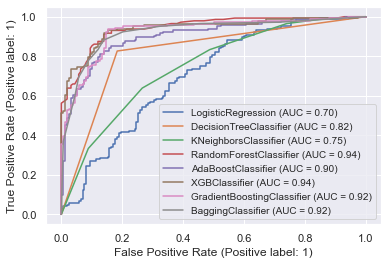

In [106]:
disp = plot_roc_curve(LR,X_test,y_test)

plot_roc_curve(DT ,X_test,y_test,ax=disp.ax_)   #ax_ - axes with confusion matrix

plot_roc_curve(knn,X_test,y_test, ax=disp.ax_)

plot_roc_curve(RF,X_test,y_test, ax=disp.ax_)

plot_roc_curve(adaboost,X_test,y_test, ax=disp.ax_)

plot_roc_curve(xgb,X_test,y_test, ax=disp.ax_)

plot_roc_curve(grad,X_test,y_test, ax=disp.ax_)

plot_roc_curve(BG,X_test,y_test, ax=disp.ax_)

plt.legend(prop={'size':10}, loc = 'best')


plt.show()

### Conclusion :
- Among all other models Random Forest Boosting Classification Model seems to giving us high scores among all evaluation metrics : 
    - Accuracy Score: 0.87
    - Precision : 0.87
    - Recall : 0.87
    - F1 : 0.87
    - Cross validation : 0.88
    - AUC Score : 0.94

### Hyperparameter Tuning of our best model

In [107]:
param_grid = {
    'criterion':['gini','entropy'],
    'max_samples' : [0.05, 0.1, 0.2, 0.5],
    'n_estimators':[10,15,20,25,30],
    'bootstrap': [True,False],
    'warm_start': [True,False]
}

In [109]:
randomcv = RandomizedSearchCV(estimator = RF, param_distributions = param_grid, n_iter = 50, cv = 3, verbose=2, random_state=42)

In [110]:
randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=False, criterion=gini, max_samples=0.2, n_estimators=20, warm_start=False; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_samples=0.2, n_estimators=20, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_samples=0.2, n_estimators=20, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_samples=0.2, n_estimators=30, warm_start=True; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_samples=0.2, n_estimators=30, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_samples=0.2, n_estimators=30, warm_start=True; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_samples=0.2, n_estimators=10, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_samples=0.2, n_estimators=10, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, crite

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_samples': [0.05, 0.1, 0.2, 0.5],
                                        'n_estimators': [10, 15, 20, 25, 30],
                                        'warm_start': [True, False]},
                   random_state=42, verbose=2)

In [111]:
#To check the best parameters to increase model Accuracy
randomcv.best_params_

{'warm_start': True,
 'n_estimators': 30,
 'max_samples': 0.1,
 'criterion': 'gini',
 'bootstrap': False}

In [112]:
Model = RandomForestClassifier(criterion = 'gini', n_estimators = 30, max_samples = 0.1, warm_start = True, bootstrap = False)

In [113]:
Model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_samples=0.1, n_estimators=30,
                       warm_start=True)

In [115]:
# Performing Evaluation metrics for our model
y_pred = Model.predict(X_test)
print('Accuracy Score for Random Forest Classifier is :',round(accuracy_score(y_test,y_pred),4)*100,'% \n')
print('Confusion Matrix of Random Forest Classifier : \n',confusion_matrix(y_test,y_pred), '\n')
print('Classification  Random Forest Classifier : \n',classification_report(y_test,y_pred))

Accuracy Score for Random Forest Classifier is : 85.42999999999999 % 

Confusion Matrix of Random Forest Classifier : 
 [[138  20]
 [ 24 120]] 

Classification  Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       158
           1       0.86      0.83      0.85       144

    accuracy                           0.85       302
   macro avg       0.85      0.85      0.85       302
weighted avg       0.85      0.85      0.85       302



array([[138,  20],
       [ 24, 120]], dtype=int64)

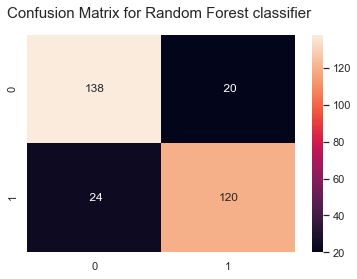

In [116]:
cm = confusion_matrix(y_test,y_pred)

#visualize confusion matrix 

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='3.0f')
plt.title('Confusion Matrix for Random Forest classifier ', y=1.05, size=15)
cm

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

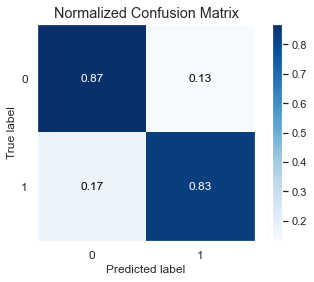

In [117]:
#Plotting Confusion Matrix Random Forest Classifier model
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

### Saving Our Best Model

In [118]:
joblib.dump(Model,"InsuranceFraudAnalysis.pkl")

['InsuranceFraudAnalysis.pkl']

### Loading Our best Model

In [119]:
model = joblib.load("InsuranceFraudAnalysis.pkl")

In [120]:
#predicting test data using loaded model
prediction = model.predict(X_test)
prediction

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,

In [121]:
#Analysing Predicted vs Actual
results = pd.DataFrame()
results['Predicted'] = prediction
results['Actual'] = y
results

Predicted  Actual
0            0       1
1            0       1
2            1       0
3            0       1
4            1       0
..         ...     ...
297          1       0
298          0       0
299          0       0
300          0       0
301          1       0

[302 rows x 2 columns]

In [122]:
#Converting the saved file into .csv format
results.to_csv('Results.csv',index = True)